# Trabalho Final

Neste trabalho final você irá pôr em prática todas as etapas exercitadas ao longo da mentoria sobre projetos de aprendizado de máquina em uma tarefa de classificação de NLP: detecção de sarcasmo. Segundo Yaghoobian et al:

    “Sarcasm detection is the task of identifying irony containing utterances in sentiment-bearing text. However, the figurative and creative nature of sarcasm poses a great challenge for affective computing systems performing sentiment analysis.”

 

Detecção de sarcasmo é uma tarefa com muitas aplicações práticas interessantes,  mas também é extremamente desafiadora. Padrões linguísticos e sociais que categorizam o sarcasmo podem não estar contido unicamente no texto ou no uso de palavras específicas, dificultando que algoritmos de aprendizado de máquina aprendam a generalizar. Nesse contexto, foi proposto por Khodak et al o dataset SARC, coletado da plataforma Reddit:


    “We introduce the Self-Annotated Reddit Corpus (SARC), a large corpus for sarcasm research and for training and evaluating systems for sarcasm detection. The corpus has 1.3 million sarcastic statements -- 10 times more than any previous dataset -- and many times more instances of non-sarcastic statements, allowing for learning in both balanced and unbalanced label regimes. Each statement is furthermore self-annotated -- sarcasm is labeled by the author, not an independent annotator -- and provided with user, topic, and conversation context.”


Em anexo, encontra-se uma amostra do SARC. Dado esse contexto, você deverá criar e validar um modelo de detecção de sarcasmo utilizando esse dataset. O trabalho deverá conter:


    Análise exploratória

        Mostre exemplos de cada classe.

        Crie pelo menos 5 gráficos, contendo um que mostre o balanceamento entre as classes. Sugestões de outros gráficos: termos mais frequentes em cada classe, distribuição da quantidade de palavras em cada classe.

        Discuta seus achados.


    Aprendizado não-supervisionado

        Qualquer técnica pode ser utilizada, clusterização ou redução de dimensionalidade. Pode-se usar parte da análise exploratória ou como auxiliar na classificação.


    Limpeza e pré-processamento dos dados

        Pelo menos 3 técnicas de pré-processamento de texto (que já não sejam utilizadas por padrão na vetorização)

        Utilize alguma técnica de balanceamento de dados


    Engenharia de atributos

        Selecione dentre os dados disponíveis quais devem ser utilizados como atributos de entrada e o método para representação vetorial.

        Utilize pelo menos dois conjuntos de atributos de entrada, comparando as performances. Justifique suas escolhas.


    Estabelecimento de um baseline

        Utilize um modelo simples, não faça otimização de hiperparâmetros. Justifique sua escolha.


    Seleção e avaliação de modelos

        Escolha uma ou mais métricas de desempenho apropriadas para esta tarefa.

        Utilize pelo menos 4 algoritmos, realizando a otimização de hiperparâmetros. Destes modelos, ao menos um deve ser um algoritmos deve ser um que não foi visto durante a mentoria. Estude o funcionamento dele. Sugestão: modelo de Deep Learning.

        Avalie os algoritmos com hiperparâmetros otimizados no conjunto de teste.


    Análise de resultados

        Mostre exemplos dos erros (falso positivos e falso negativos) para o melhor dos algoritmos experimentados.

        Discuta os resultados e aponte quais seriam possíveis melhorias


    (OPCIONAL) Interpretabilidade

        Utilize algum método que permita uma interpretação das predições de algum dos seus modelos.


    (OPCIONAL) Deploy

        Implemente uma API para que o seu melhor modelo possa ser utilizado via requisições HTTP.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

Primeiramente, alterando as configurações do dataframe para que ele exiba os textos completos, e logo em seguida imprimindo o dataframe para realizar sua análise.

In [64]:
pd.set_option("display.max_colwidth", None)
df = pd.read_csv('sarc_sample.csv')
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,"Of course, just like 3.2 was the true Messiah.",ReticentHedgehog,ffxiv,1,1,0,2016-05,2016-05-02 20:20:37,"Is patch 3.3 going to be our savior? Without trying to sound like a broken record and repeating the many point of views of the growing apocalyptic threads on this forum. I was hoping to get the opinions of everyone if they believe patch 3.3 is going to bring back some of the players who have quit in the last patch or two, or does this feel like another cookie cutter patch that wont stop exit of quality population specifically on the North American servers. I ask this in concern that I have made a assertive effort as of late to refill our FC, and one of the strong points of the patch info so far is that they are installing a cross realm raid tool, which seems like it would diminish the need to recruit for a FC. I personally enjoy the aspect of a 10-15 member FC which can grow close and share things in common to the game and outside the game. But with the game seemingly losing subs it has become harder to find people to come together like I had just described and I don't want to put false hope in those who I have recruited so far. Give me some hope!"
1,1,"Yeah because Iran was 100% muslim prior to 1979, and still is now.",methmobile,worldnews,-3,-1,-1,2016-12,2016-12-30 10:21:31,I suggest you research Iran pre-1979 as well as al-Qatb and the rise of Wahhabism. You are fully entitled to have an opinion and express it (and you do bring up a good point re: rural cobservatism) but you are misinformed.
2,1,WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND POST AND TAKE YOUR DOWNVOTES,dillydelly,nba,1,1,0,2014-05,2014-05-04 08:02:30,"Warriors / Clips game threads literally add zero value to the game experience. Why would I want to see the words flop, flopped and flopper repeated constantly? Thunder / Clips game threads were pretty good during the season. We'll see how the playoff ones are."
3,1,"Yeah, it's dumb to run background checks on potential teachers.",Krenolds,AskReddit,1,1,0,2014-09,2014-09-02 08:09:10,"Oh i forgot.., you get to be finger printed when you are hired! Awesome!"
4,1,"Oh, it's not that bad once you get a handle on the crippling depression and constant tooth grinding.",ericanderton,AskReddit,4,4,0,2011-08,2011-08-24 13:17:20,Haha oh. Definitely not an option than.
...,...,...,...,...,...,...,...,...,...,...
59995,0,"room you mean like, dimension?",Tikikala,digimon,1,1,0,2016-03,2016-03-26 03:42:22,"So as another guy pointed out. Huckmon might be projecting Ken as a way to steal Meicoomon, remember he was lurking all the time. Also he was in the 'room' after Ken disappeared"
59996,0,I wasn't too fond of grabner in 14 so I put Bergeron up the middle to win draws and set up plays and what not.,mrhairybolo,hockey,1,1,0,2014-08,2014-08-10 05:57:31,Hall - Duchene - Grabner?
59997,0,he wasn't even at worlds in season 4!,Highstalker,leagueoflegends,-1,-1,0,2016-09,2016-09-19 14:41:23,Yeah he was.
59998,0,"Right, but the Trump sign...",gcbeehler5,pics,2,2,0,2016-09,2016-09-01 02:14:54,I wouldn't say you have to be liberal to appreciate sustainability. You just have to not be an ignorant twat.


### Análise exploratória

Nesta etapa, coletei 4 amostras de cada classe para melhor comparação, conforme foi orientado na descrição da atividade.

In [65]:
um = df['label'] == 1
df[um].sample(n = 4)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
11316,1,But it's not a bubble!,CuilRunnings,Economics,18,18,0,2013-07,2013-07-01 16:24:46,"And 60+ percent is owed by those 35 and younger. $43 billion is peanuts compared to the other $1,000 billion that is out there. If we go back to the year 2000, I believe there was something like $200 billion in total student loans. Today it is over $1 trillion."
34854,1,"Yes, attempting to touch a country's flag should be met with sufficient force to kill.",ribald86,MorbidReality,1,1,0,2012-08,2012-08-14 18:44:55,Here I was thinking he was just an innocent man climbing a pole for fun.
20980,1,My IQ must be in the thousands.,PikaFuck,cringepics,1,1,0,2014-10,2014-10-25 17:42:56,whenever someone mentions their IQ in an argument... I just can't take them seriously.
21408,1,[This is a random event - you're supposed to help that guy],deskplace,GrandTheftAutoV,17,17,0,2013-09,2013-09-19 05:32:09,"I was driving through the Vinewood hills, passed a guy getting kicked out by his girlfriend/wife. She was throwing his shit off the balcony and everything. She goes ""you think I'm stupid? Who goes golfing at midnight?!"" ...classic"


In [66]:
zero = df['label'] == 0
df[zero].sample(n = 4)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
41366,0,Del Rio got destroyed by CroCop though and is 39.,Minijimbo,SquaredCircle,0,0,0,2016-07,2016-07-11 09:57:45,Del Rio for sure
54865,0,"Can't be, not possible, the only places with better fried chicken than cocos is MEAT and that's only because theirs is smoked AND fried.",gingeredbiscuit,Edmonton,0,0,0,2016-07,2016-07-06 22:50:33,Better than coco's?
48036,0,"I too have the pants, and would be willing to trade for the hat.",Faithhandler,ACTrade,1,1,0,2013-06,2013-06-19 16:11:16,Heros Hat Varia Suit Pants
54142,0,csvs csvs csvs,TheGoldenNewtRobber,RLTP,1,1,0,2014-10,2014-10-07 20:57:51,"Yea, If not We can just have someone take a screenshot of all the final scores of the games and send them to an email? I am willing to help with the stat keeping??"


## Etapas de pré-processamento

Para realizar a coleta de informações que seriam utilizadas nos gráficos, foi necessário antecipar a etapa de pré-processamento dos dados, as funções a baixo tem o objetivo de remover alguns tipos de caracteres que não são utéis durante a análise dos dados.

1. Primeiramente a função "remover_pontuação" faz uso de list comprehension para iterar entre os caracteres do texto e remover os caracteres que estão incluidos em "string.punctuation".

In [67]:
import string
def remover_pontuacao(text):
    sem_pontuacao="".join([i for i in text if i not in string.punctuation])
    return sem_pontuacao

2. A função "lower" tem o objetivo de deixar todas as palavras do texto em minúsculo, criando um padrão mais fácil de detectar nos caracteres. Esse passo é muito importante para realizar a remoção de stopwords, pois todas as palavras na lista de stopwords estão em letra minúscula.

In [68]:
def lower(text):
    return text.lower()

3. A função "remove_nums" utiliza regex para detectar e remover todos os números do conjunto de dados, isso é importante pois em geral caracteres numéricos não trazem muita informação, e ao retirá-los é possível diminuir bastante a quantidade de dimensões do conjunto.

In [69]:
import re
def remove_nums(text):
    num_regex = '\d+'
    t = re.sub(num_regex, '', text)
    return t

4. A função "remove_stop_words" serve para remover as stopwords do conjunto de dados. Igualmente aos caracteres númericos as stopwords não agregam muitas informações durante a análise, por isso, geralmente é benéfico fazer sua retirada, principalmente pois elas costumam se repetir muitas vezes durante os textos, assim, aumentando a quantidade de dimensões.

In [70]:
import nltk
def remove_stop_words(text):
    stopwords = nltk.corpus.stopwords.words('english')
    texto = [w for w in text.split() if w not in stopwords]
    frase = " ".join(texto)
    return frase

5. A função "lemmatizer" tem o proposito de transformar as palavras do conjunto de dados em suas formas base, com o cuidado para que elas não percam o sentido. Esse passo é importante para simplificar o texto, ajudando a extrair o máximo de informação.

In [71]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    texto = [wordnet_lemmatizer.lemmatize(word) for word in text.split()]
    frase = " ".join(texto)
    return frase

6. A função "remove_little_words" remove do conjunto de dados as palavras que possuem apenas 2 ou menos caracteres, pois essas palavras curtas, em geral, não trazem muitas informações e na maioria das vezes se tratam de erros de digitação.

In [72]:
def remove_little_words(text):
    frase =" ".join([w for w in text.split() if len(w) > 3])
    return frase

7. A função "preprocess" é responsável por executar algumas das funções acima, facilitando o uso destas em conjunto. Criei duas funções para chamar as funções de pré-processamento, a primeira é utilizada apenas para pré-processar as informações que serão coletadas para uso nos gráficos. Na função preprocess, a ordem em que as funções são chamadas é muito importante, pois a lista de stopwords utilizada possui apenas palavras em minúsculo e com o uso correto das pontuações, logo, se retirarmos as  pontuações antes das stopwords, algumas palavras podem acabar escapando.

In [73]:
def preprocess(text):
        text = remove_nums(text)
        text = lower(text)
        text = remove_stop_words(text)
        text = remover_pontuacao(text)
        text = lemmatizer(text)
        return text

8. A função "preprocess2" é a segunda função para chamar as funções de pré-processamento, ela foi criada pois a vetorização já realiza algumas etapas de pré-processamento, então, seria redundante utilizar certas funções nos dados que seriam vetorizados.

In [74]:
def preprocess2(text):
        text = remove_nums(text)
        text = remove_little_words(text)
        text = lemmatizer(text)
        return text

## Gráficos

Primeiramente temos o gráfico da quantidade de itens de cada classe. É possível reparar que existem muito mais itens na classe "1" do que na classe "0", isso significa que esse é um conjunto de dados desbalanceado, e futuramente precisaremos utilizar algumas tecnicas para realizar o seu balanceamento

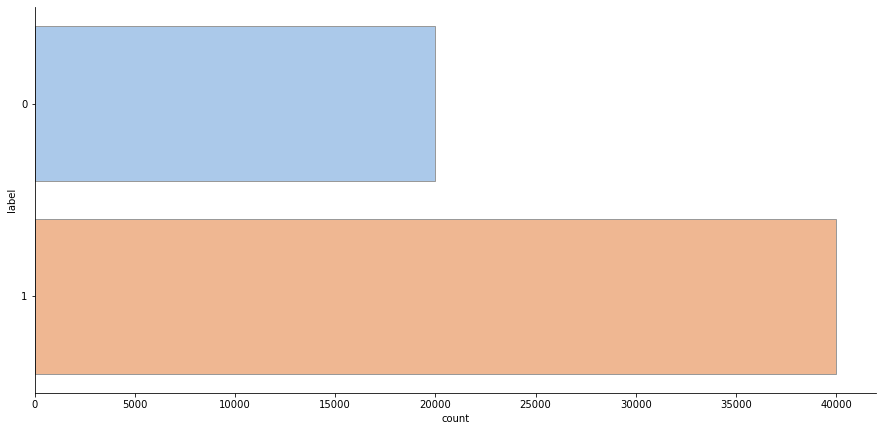

In [75]:
# Gráfico do balanceamento entre as classes
sns.catplot(y="label", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.gcf().set_size_inches(13, 6)

O segundo gráfico mostra as 10 palavras que mais se repetiram nos comentários classificados na classe "1", que seriam os comentários sarcásticos.

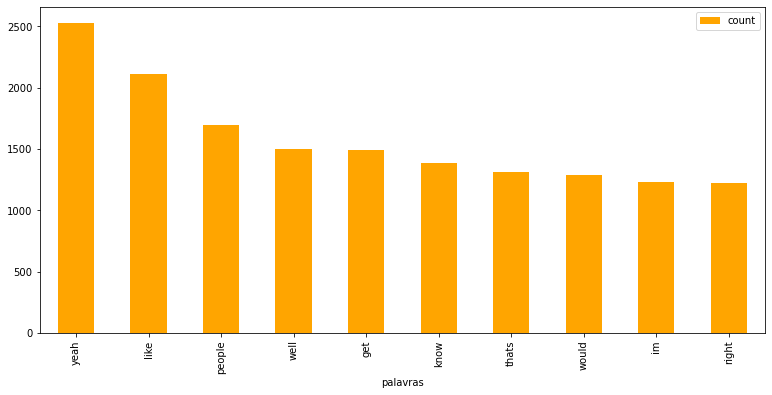

In [76]:
# Gráfico das palavras que aparecem com mais frequência na classe 1
q = df[um]
q = q.comment.explode().to_frame().reset_index(drop=True)
P=' '.join([str(w) for w in q['comment']])
P = preprocess(P)
palavras = P.split()
dfp = pd.DataFrame (palavras, columns = ['palavras'])
dfc = dfp.groupby('palavras').palavras.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)

dfc.plot.bar(x='palavras', color='orange')
plt.gcf().set_size_inches(13, 6)

No terceiro gráfico, temos as 10 palavras mais frequentes nos comentários classificados na classe "0". Comparando com as palavras obtidas no gráfico anterior podemos observar muitas similaridades, porém, é interessante perceber que a palavra "yeah", que foi a que mais apareceu na classe "1", não chegou a aparecer nem no top 10 da classe "0", ou seja, essa palavra é muito mais utilizada em frases sarcásticas.

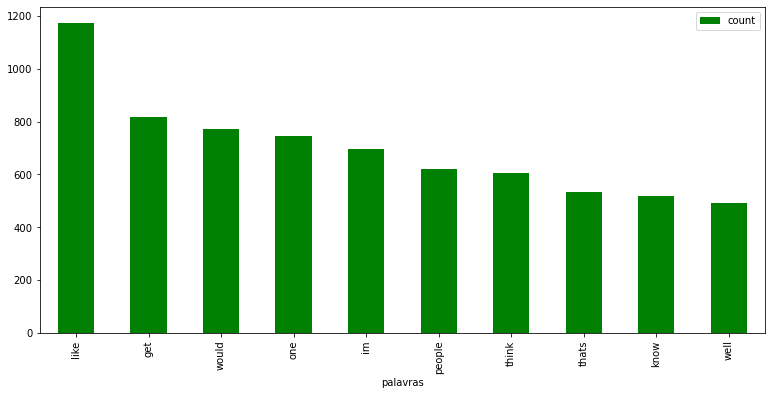

In [77]:
# Gráfico das palavras que aparecem com mais frequência na classe 0
q2 = df[zero]
q2 = q2.comment.explode().to_frame()
P2=' '.join([str(w) for w in q2['comment']])
P2 = preprocess(P2)
palavras2 = P2.split()
dfp2 = pd.DataFrame (palavras2, columns = ['palavras'])
dfc2 = dfp2.groupby('palavras').palavras.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)

dfc2.plot.bar(x='palavras', color='green')
plt.gcf().set_size_inches(13, 6)

Na quarta figura, podemos ver um gráfico da quantidade de comentários que foram coletados para esse conjunto de dados em cada data(mês/ano). É possível perceber que em todas as datas, a quantidade de comentários sarcásticos coletados sempre foi maior, e em dezembro de 2016 foi coletada a maior quantidade de amostras. Nesse caso é importante observar a data das amostras, pois o contexto da época acaba influênciando nos comentários, e isso ajuda a identificar o que pode ser sarcástico ou não.

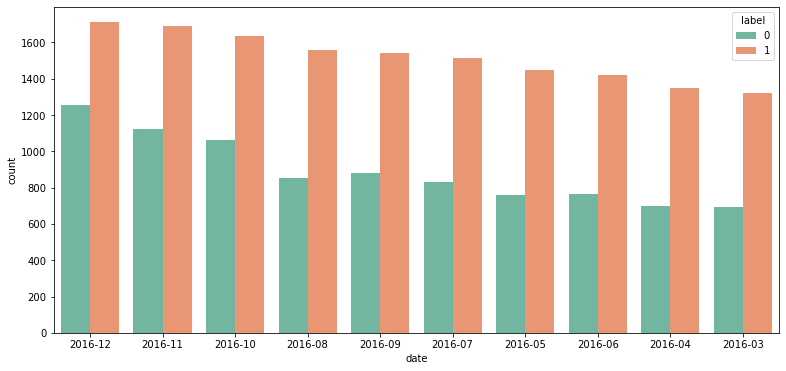

In [78]:
q = df[um]
day = q.date.explode().to_frame().reset_index(drop=True)
dfd = pd.DataFrame (day, columns = ['date'])
dfcd = dfd.groupby('date').date.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)
q2 = df[zero]
day2 = q2.date.explode().to_frame().reset_index(drop=True)
dfd2 = pd.DataFrame (day2, columns = ['date'])
dfcd2 = dfd2.groupby('date').date.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)
dfcd['label'] = 1
dfcd2['label'] = 0
dfcd3 = pd.concat([dfcd, dfcd2], axis=0)
ax = sns.barplot(x="date", y="count", hue="label", palette="Set2", data=dfcd3)
plt.gcf().set_size_inches(13, 6)

No quinto gráfico, podemos observar uma comparação entre a distribuição da quantidade de caracteres dos comentários das duas classes.

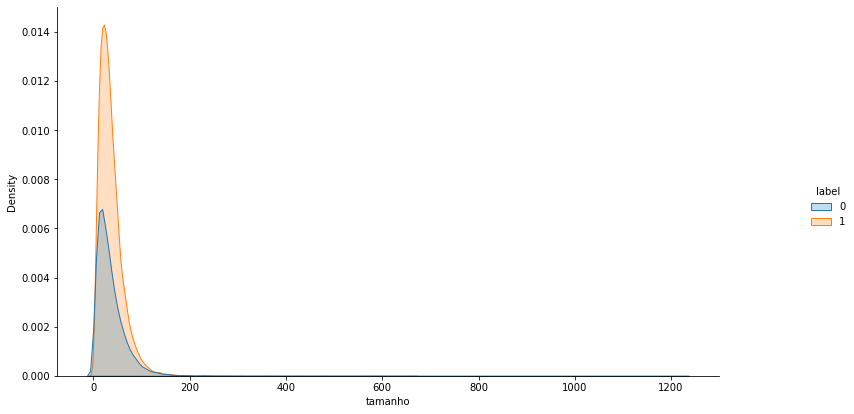

In [79]:
df['comment'] = df['comment'].astype('str')
lista = []
for i in df['comment']:
    f = preprocess(i)
    lista.append(f)
    
dc = pd.DataFrame (lista, columns = ['comment'])
label = df['label']
df_dc = pd.concat([dc, label], axis=1)
df_dc['tamanho']= dc['comment'].apply(len)
sns.displot(df_dc, x="tamanho", hue="label", kind="kde", fill=True)
plt.gcf().set_size_inches(13, 6)

## Modelo Baseline

### Área em construção, markdowns ainda serão acrescentados.

In [80]:
X = df['comment']
y = df['label']

In [81]:
lista = []
for i in X:
    f = preprocess(i)
    lista.append(f)
X_PP = pd.DataFrame (lista, columns = ['comment'])

In [82]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_PP,y, test_size=0.2, random_state=42)

In [83]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_r, y_r = ros.fit_resample(X_train_valid, y_train_valid)

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2))
X_tf = tf.fit_transform(X_r['comment'])
X_test_tf = tf.transform(X_test['comment'])

A remoção da pontuação realizada durante a vetorização acabou deixando alguns caracteres indesejados, como o " _ "

In [85]:
c=0
for i in tf.get_feature_names():
    print(i)
    c+=1
    if c == 100:
        break

aa
aa awp
aa capability
aa hunter
aa like
aa modifier
aa reset
aa touched
aa ual
aa want
aaa
aaa fps
aaa game
aaa ideology
aaa tpp
aaa vr
aaaaa
aaaaa battery
aaaaaaaaand
aaaaaaaaand shit
aaaaaaaagaaaaaaaaaaaaaaaaaaiiiiiiiiiiiiin
aaaaaaaagaaaaaaaaaaaaaaaaaaiiiiiiiiiiiiin mah
aaaaaaaany
aaaaaaaany social
aaaaaaamnnnnnnnddddd
aaaaaaamnnnnnnnddddd gone
aaaaaaand
aaaaaaand fined
aaaaaand
aaaaaand thats
aaaaaannnddd
aaaaaannnddd want
aaaaaannnnnnnndddd
aaaaaannnnnnnndddd im
aaaaall
aaaaand
aaaaand ksp
aaaand
aaaand im
aaand
aaand retagged
aahahahaha
aahahahaha idea
aajkal
aampm
aampm going
aampm like
aampm overtime
aampm prairie
aan
aan die
aan hand
aan het
aan vraag
aand
aand guy
aand healthy
aang
aang katara
aangereden
aangereden het
aap
aap follow
aap nay
aap place
aap wonder
aar
aar cuda
aare
aare make
aaron
aaron diaz
aaron hernandez
aaron lmao
aaron peskin
aaron rodgers
aav
aav mil
aave
ab
ab allowed
ab better
ab got
ab ill
ab popular
ab testing
ababa
abaddon
abaddon fall
abandon
aband

In [86]:
from sklearn.linear_model import LogisticRegression
LRB = LogisticRegression()
LRB.fit(X_tf, y_r)

LogisticRegression()

In [87]:
y_predictB = LRB.predict(X_test_tf)

In [88]:
from sklearn.metrics import accuracy_score
A1 = accuracy_score(y_test, y_predictB)
print(f'A acurácia foi de: {round(A1*100, 2)}%')

A acurácia foi de: 66.26%


## 1° Conjunto de atributos de entrada

In [89]:
X1 = df[['comment', 'parent_comment']]
y = df['label']

In [90]:
X1['conc'] = X1[['comment', 'parent_comment']].agg(' '.join, axis=1)

In [91]:
lista = []
for i in X1['conc']:
    f = preprocess(i)
    lista.append(f)
X1_PP = pd.DataFrame (lista, columns = ['conc'])

In [92]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X1_PP,y, test_size=0.2, random_state=42)

In [93]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_r, y_r = ros.fit_resample(X_train_valid, y_train_valid)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2), min_df=2)
X_tf = tf.fit_transform(X_r['conc'])
X_test_tf = tf.transform(X_test['conc'])

In [95]:
X_train, X_valid, y_train, y_valid = train_test_split(X_tf,y_r, test_size=0.2, random_state=42)

In [96]:
tf.get_feature_names()

['aa',
 'aa aaa',
 'aa apply',
 'aa config',
 'aa modifier',
 'aa sure',
 'aa touched',
 'aaa',
 'aaa edc',
 'aaa game',
 'aaa publisher',
 'aaaaa',
 'aaaaa battery',
 'aaaaaaand',
 'aaaaaannnddd',
 'aaaaaannnddd want',
 'aaaaaannnnnnnndddd',
 'aaaaaannnnnnnndddd im',
 'aaaaand',
 'aaaand',
 'aaaand zerg',
 'aaand',
 'aaand retagged',
 'aac',
 'aac rest',
 'aampm',
 'aampm bama',
 'aampm like',
 'aan',
 'aan hand',
 'aan het',
 'aan wat',
 'aand',
 'aandacht',
 'aandacht krijgt',
 'aang',
 'aang katara',
 'aangereden',
 'aangereden het',
 'aangezien',
 'aangezien ik',
 'aap',
 'aap tatter',
 'aaron',
 'aaron hernandez',
 'aaron peskin',
 'aaron poochigian',
 'aaron rodgers',
 'aaron smith',
 'aatrox',
 'aatrox immune',
 'aav',
 'aayla',
 'aayla secura',
 'ab',
 'ab chubby',
 'ab jiggly',
 'ab muscle',
 'ab popular',
 'aback',
 'abadango',
 'abandon',
 'abandon enrages',
 'abandon plan',
 'abandon ship',
 'abandoned',
 'abandoned depends',
 'abandoned feel',
 'abandoned irradiated',
 'a

### 1° Modelo: Regressão logística

In [97]:
from sklearn.model_selection import GridSearchCV
metricas = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
parametersRL = {'C':[1.0, 0.5, 1.5, 2.0],
              'penalty': ['l2', 'none'],
              'solver':['lbfgs', 'saga', 'newton-cg']}

In [98]:
LRB = LogisticRegression()
clf = GridSearchCV(LRB, param_grid=parametersRL, scoring=metricas, refit='accuracy', return_train_score=False)
clf.fit(X_train, y_train)
clf.best_estimator_

LogisticRegression(C=1.5, penalty='none', solver='saga')

In [99]:
y_predict = clf.predict(X_valid)
A1 = accuracy_score(y_valid, y_predict)
print(f'A acurácia foi de: {round(A1*100, 2)}%')

A acurácia foi de: 81.51%


In [100]:
LRB = LogisticRegression(C=1.5, penalty='none', solver='saga')
LRB.fit(X_tf, y_r)

LogisticRegression(C=1.5, penalty='none', solver='saga')

In [101]:
y_predict = LRB.predict(X_test_tf)

In [102]:
from sklearn.metrics import accuracy_score
A1 = accuracy_score(y_test, y_predict)
print(f'A acurácia foi de: {round(A1*100, 2)}%')

A acurácia foi de: 64.94%


### 2° Modelo: Naive bayes

In [103]:
parametersNB = {'alpha':[1.0, 0.5, 1.5, 2.0],
              'fit_prior': [True, False]}

In [104]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
clf = GridSearchCV(NB, param_grid=parametersNB, scoring=metricas, refit='accuracy')
clf.fit(X_train, y_train)
clf.best_estimator_

MultinomialNB(alpha=0.5, fit_prior=False)

In [105]:
y_predict = clf.predict(X_valid)
A1 = accuracy_score(y_valid, y_predict)
print(f'A acurácia foi de: {round(A1*100, 2)}%')

A acurácia foi de: 78.67%


In [106]:
NB = MultinomialNB(alpha=0.5, fit_prior=False)
NB.fit(X_tf, y_r)

MultinomialNB(alpha=0.5, fit_prior=False)

In [107]:
y_predict = NB.predict(X_test_tf)

In [108]:
from sklearn.metrics import accuracy_score
A1 = accuracy_score(y_test, y_predict)
print(f'A acurácia foi de: {round(A1*100, 2)}%')

A acurácia foi de: 66.9%


In [109]:
# lista = []
# for i in X_r['comment']:
#     f = preprocess2(i)
#     lista.append(f)
# d1 = pd.DataFrame (lista, columns = ['comment'])

In [110]:
#lista2 = []
#for i in X_r['parent_comment']:
#    f = preprocess2(i)
#    lista2.append(f)
#d2 = pd.DataFrame (lista2, columns = ['parent_comment'])

In [111]:
#X_PP = pd.concat([d1, d2], axis=1)
#X_PP